ANURADHA ARUMUGAM

OASIS INFOBYTE

TASK 3: CAR PRICE PREDICTION

In [ ]:
from google.colab import data_table
data_table.enable_dataframe_formatter()

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix
from sklearn.linear_model import LinearRegression

In [ ]:
df=pd.read_csv('/content/01_CarPrice.csv')
df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [ ]:
header=[]
for i in df:
  header.append(i)
print(header)

['car_ID', 'symboling', 'CarName', 'fueltype', 'aspiration', 'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'wheelbase', 'carlength', 'carwidth', 'carheight', 'curbweight', 'enginetype', 'cylindernumber', 'enginesize', 'fuelsystem', 'boreratio', 'stroke', 'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg', 'price']


In [ ]:
df.isnull().sum()

car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

In [ ]:
cars=[]

for i in df['CarName']:
  if i not in cars:
    cars.append(i)
    print(i)

print(cars)

alfa-romero giulia
alfa-romero stelvio
alfa-romero Quadrifoglio
audi 100 ls
audi 100ls
audi fox
audi 5000
audi 4000
audi 5000s (diesel)
bmw 320i
bmw x1
bmw x3
bmw z4
bmw x4
bmw x5
chevrolet impala
chevrolet monte carlo
chevrolet vega 2300
dodge rampage
dodge challenger se
dodge d200
dodge monaco (sw)
dodge colt hardtop
dodge colt (sw)
dodge coronet custom
dodge dart custom
dodge coronet custom (sw)
honda civic
honda civic cvcc
honda accord cvcc
honda accord lx
honda civic 1500 gl
honda accord
honda civic 1300
honda prelude
honda civic (auto)
isuzu MU-X
isuzu D-Max 
isuzu D-Max V-Cross
jaguar xj
jaguar xf
jaguar xk
maxda rx3
maxda glc deluxe
mazda rx2 coupe
mazda rx-4
mazda glc deluxe
mazda 626
mazda glc
mazda rx-7 gs
mazda glc 4
mazda glc custom l
mazda glc custom
buick electra 225 custom
buick century luxus (sw)
buick century
buick skyhawk
buick opel isuzu deluxe
buick skylark
buick century special
buick regal sport coupe (turbo)
mercury cougar
mitsubishi mirage
mitsubishi lancer
mits

<ipython-input-15-e1db6d8fa832>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = d.corr()


<Axes: >

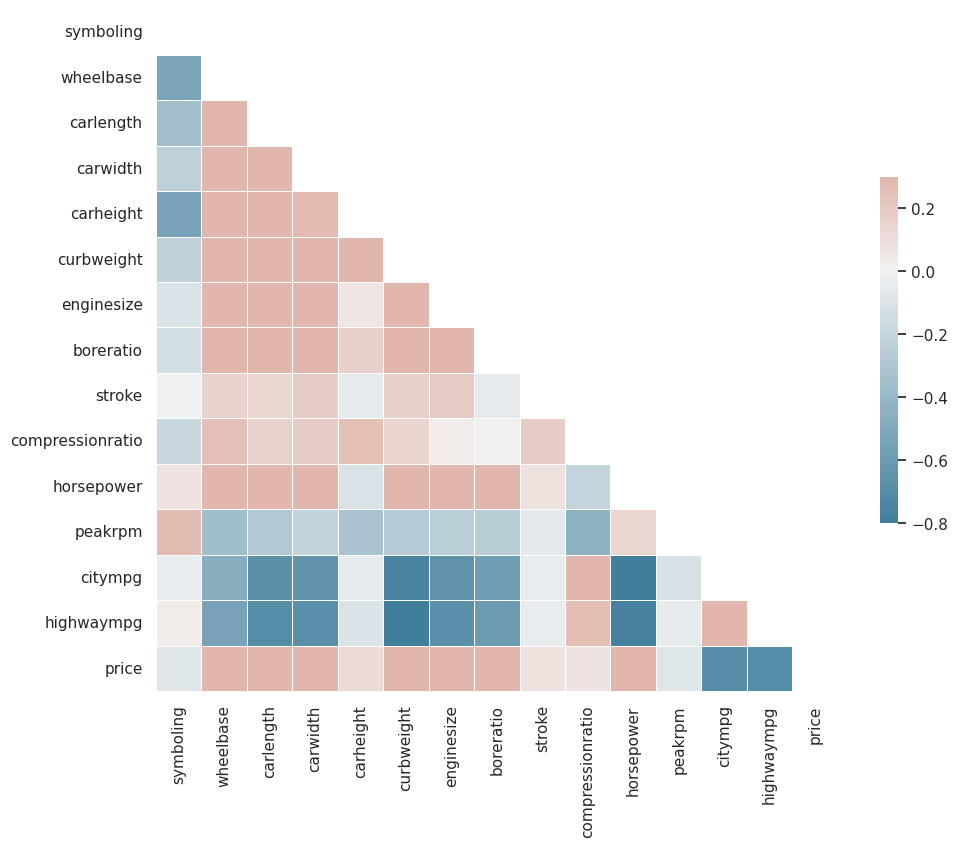

In [ ]:
sns.set_theme(style="white")
d = df1
corr = d.corr()
# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [ ]:
import plotly.express as px
fig = px.imshow(df1, text_auto=True,aspect="auto")
fig.show()

<ipython-input-17-518c5c623670>:1: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



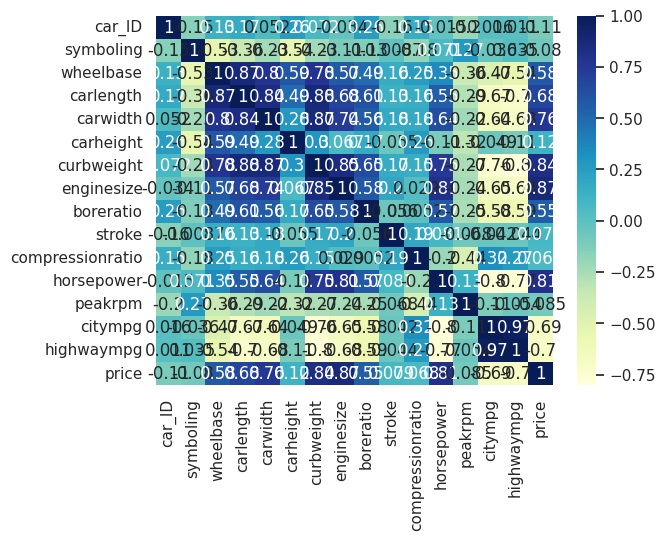

In [ ]:
dataplot = sns.heatmap(df.corr(), cmap="YlGnBu", annot=True)

In [ ]:
print("Feature Selection:")
print(header)

Feature Selection:
['car_ID', 'symboling', 'CarName', 'fueltype', 'aspiration', 'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'wheelbase', 'carlength', 'carwidth', 'carheight', 'curbweight', 'enginetype', 'cylindernumber', 'enginesize', 'fuelsystem', 'boreratio', 'stroke', 'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg', 'price']


In [ ]:
df1=df[['symboling', 'wheelbase','fueltype','aspiration', 'carlength','carbody', 'carwidth', 'carheight', 'curbweight', 'enginesize','enginetype', 'boreratio', 'stroke', 'compressionratio','fuelsystem', 'horsepower', 'peakrpm', 'citympg', 'highwaympg','price']].copy()

In [ ]:
print(df1.corr())

                  symboling  wheelbase  carlength  carwidth  carheight  \
symboling          1.000000  -0.531954  -0.357612 -0.232919  -0.541038   
wheelbase         -0.531954   1.000000   0.874587  0.795144   0.589435   
carlength         -0.357612   0.874587   1.000000  0.841118   0.491029   
carwidth          -0.232919   0.795144   0.841118  1.000000   0.279210   
carheight         -0.541038   0.589435   0.491029  0.279210   1.000000   
curbweight        -0.227691   0.776386   0.877728  0.867032   0.295572   
enginesize        -0.105790   0.569329   0.683360  0.735433   0.067149   
boreratio         -0.130051   0.488750   0.606454  0.559150   0.171071   
stroke            -0.008735   0.160959   0.129533  0.182942  -0.055307   
compressionratio  -0.178515   0.249786   0.158414  0.181129   0.261214   
horsepower         0.070873   0.353294   0.552623  0.640732  -0.108802   
peakrpm            0.273606  -0.360469  -0.287242 -0.220012  -0.320411   
citympg           -0.035823  -0.470414

<ipython-input-47-8f41f11c0285>:1: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



<Axes: >

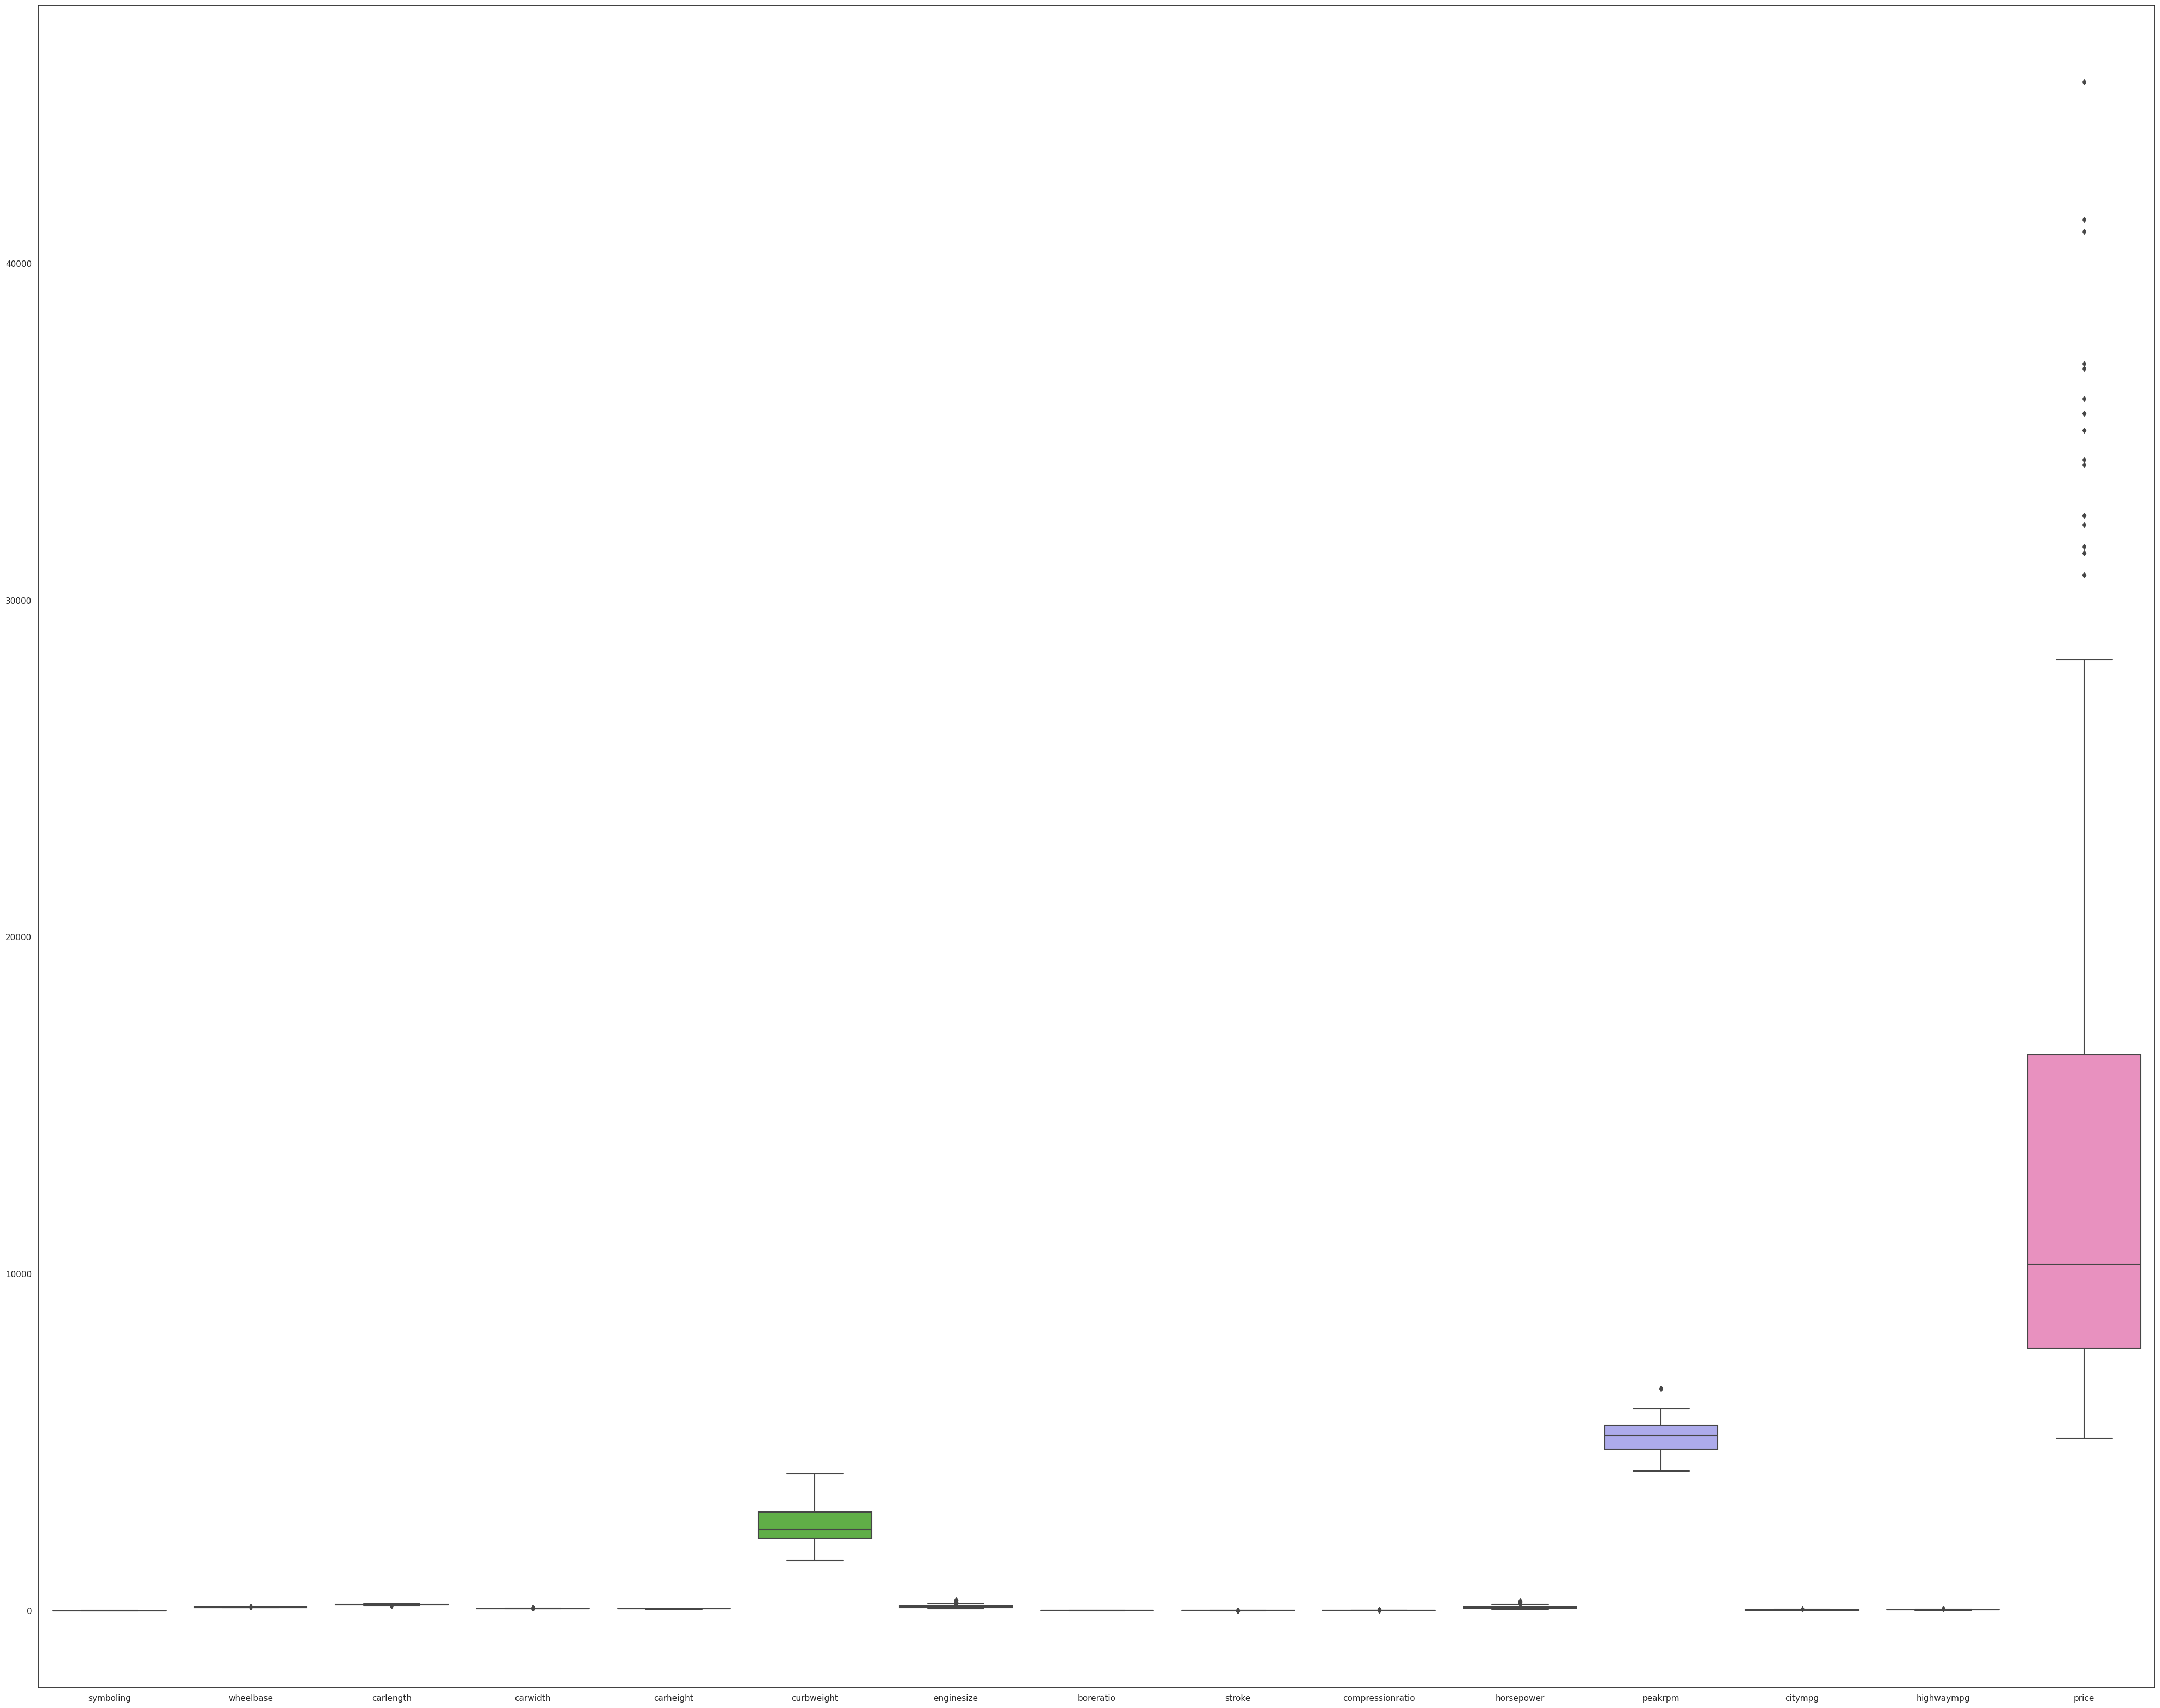

In [ ]:
plt.figure(figsize=(50,40));
sns.boxplot(df1)

In [ ]:
q_low = df1["enginesize"].quantile(0.01)
q_hi  = df1["enginesize"].quantile(0.99)

df1 = df1[(df["enginesize"] < q_hi) & (df1["enginesize"] > q_low)]

q_low = df1["horsepower"].quantile(0.01)
q_hi  = df1["horsepower"].quantile(0.99)

df1 = df1[(df1["horsepower"] < q_hi) & (df1["horsepower"] > q_low)]

q_low = df1["compressionratio"].quantile(0.01)
q_hi  = df1["compressionratio"].quantile(0.99)

df1 = df1[(df1["compressionratio"] < q_hi) & (df1["compressionratio"] > q_low)]


In [ ]:
df1.head()

,symboling,wheelbase,fueltype,aspiration,carlength,carbody,carwidth,carheight,curbweight,enginesize,enginetype,boreratio,stroke,compressionratio,fuelsystem,horsepower,peakrpm,citympg,highwaympg,price
0,3,88.6,gas,std,168.8,convertible,64.1,48.8,2548,130,dohc,3.47,2.68,9.0,mpfi,111,5000,21,27,13495.0
1,3,88.6,gas,std,168.8,convertible,64.1,48.8,2548,130,dohc,3.47,2.68,9.0,mpfi,111,5000,21,27,16500.0
2,1,94.5,gas,std,171.2,hatchback,65.5,52.4,2823,152,ohcv,2.68,3.47,9.0,mpfi,154,5000,19,26,16500.0
3,2,99.8,gas,std,176.6,sedan,66.2,54.3,2337,109,ohc,3.19,3.40,10.0,mpfi,102,5500,24,30,13950.0
4,2,99.4,gas,std,176.6,sedan,66.4,54.3,2824,136,ohc,3.19,3.40,8.0,mpfi,115,5500,18,22,17450.0


In [ ]:
df1=pd.get_dummies(df1,columns=['fueltype'],prefix='fueltype',drop_first=True)
df1=pd.get_dummies(df1,columns=['aspiration'],prefix='aspiration',drop_first=True)
df1=pd.get_dummies(df1,columns=['carbody'],prefix='enginelocation',drop_first=True)
df1=pd.get_dummies(df1,columns=['enginetype'],prefix='enginelocation',drop_first=True)
df1=pd.get_dummies(df1,columns=['fuelsystem'],prefix='fuelsystem',drop_first=True)
df1.head()

,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,...,enginelocation_l,enginelocation_ohc,enginelocation_ohcf,enginelocation_ohcv,enginelocation_rotor,fuelsystem_2bbl,fuelsystem_idi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi
0,3,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,...,0,0,0,0,0,0,0,1,0,0
1,3,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,...,0,0,0,0,0,0,0,1,0,0
2,1,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,...,0,0,0,1,0,0,0,1,0,0
3,2,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,...,0,1,0,0,0,0,0,1,0,0
4,2,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,...,0,1,0,0,0,0,0,1,0,0


In [ ]:
y=df1['price']
df1=df1.drop(['price'],axis=1)
x=df1
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=0)
model=LinearRegression()
model.fit(x_train,y_train)
y_pred=model.predict(x_test)
print(y_pred)

[18179.55639631  7487.26689169  9864.32070818 16883.93495091
 18310.29404641 16282.25958088 19514.04228328  8211.64030083
 28531.55229175 11529.97426287 17086.55720282  9576.95879431
 20026.0309209   8661.80407673 10217.50246623 12305.65602434
 10904.44287857  6414.40549474  6713.31243227 10303.0285846
  7712.30825533 11618.92523077  7883.133354    7583.25011285
 18955.58150721 21045.059464   18755.46342914 21729.45289902
 32338.60144468 18944.91908274 12839.77520914 28233.5859817
 12868.41856423 27929.50949322 17400.70178472  8593.58556442
 21102.47572612 32338.60144468 17509.45313333  9401.2942778
  4791.66368936  9528.47135663  7836.05698444  8210.63747687
 12140.24379247 12226.94153679]


In [ ]:
import sklearn.metrics as sm
print("R2 score =", round(sm.r2_score(y_test, y_pred), 2))

R2 score = 0.85


In [ ]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
pipe = make_pipeline(StandardScaler(), LinearRegression())
pipe.fit(x_train, y_train)
print(round(pipe.score(x_test, y_test),2))

0.85


In [ ]:
from sklearn.tree import DecisionTreeRegressor
import math
dt = DecisionTreeRegressor()
dt.fit(x_train, y_train)
y_pred = dt.predict(x_test)
print("R2 score =", round(sm.r2_score(y_test, y_pred),2))
print("mean_absolute_error =", sm.mean_absolute_error(y_test, y_pred))
print("mean_squared_error =", math.sqrt(sm.mean_absolute_error(y_test, y_pred)))

R2 score = 0.92
mean_absolute_error = 1535.7826086956522
mean_squared_error = 39.189062360506306


In [ ]:
import xgboost as xg
xgb_r = xg.XGBRegressor(objective ='reg:squarederror',
                  n_estimators = 10, seed = 123)
xgb_r.fit(x_train, y_train)
y_pred = dt.predict(x_test)
print("Model Score:",round(model.score(x_test,y_pred)))

Model Score: 1
